# Outliers in SageWorks: An Exploration 

<div style="float: right; padding: 20px"><img width="350" src="https://user-images.githubusercontent.com/4806709/236641571-fc38899a-8b92-4b7c-80a0-cc9d39b92e4a.png"></div>

This notebook investigate data distributions and potential outlier metrics
- Mean, Stddev (https://en.wikipedia.org/wiki/Standard_deviation)
- IQR, Scale (https://en.wikipedia.org/wiki/Interquartile_range)

## Data
We're using scipy to generate data with different distribution properties.

### References
- Numpy (https://numpy.org/)
- Scipy (https://scipy.org/)
- Fitter (https://github.com/cokelaer/fitter)

# Outlier Approaches and Data Distributions
For this notebook we're looking at a reasonable set of data distributions and how the IQR and Stddev method compare when computing outliers on those datasets.

- TWO nice images/graphics of:
  - mean/stddev
  - IQR/scale

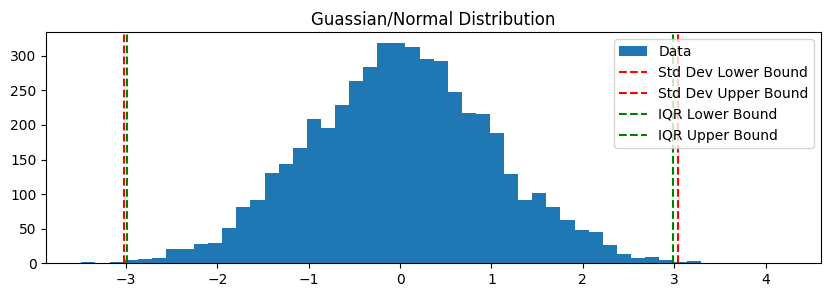

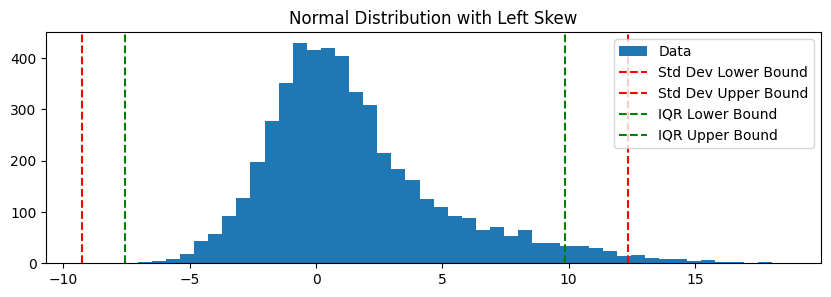

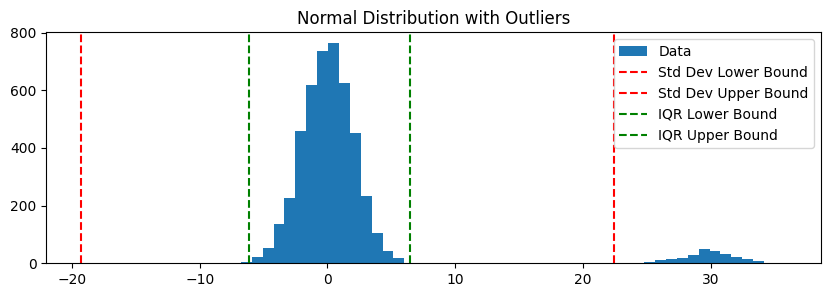

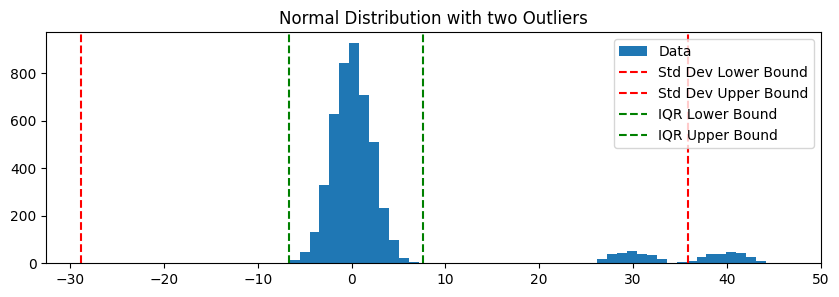

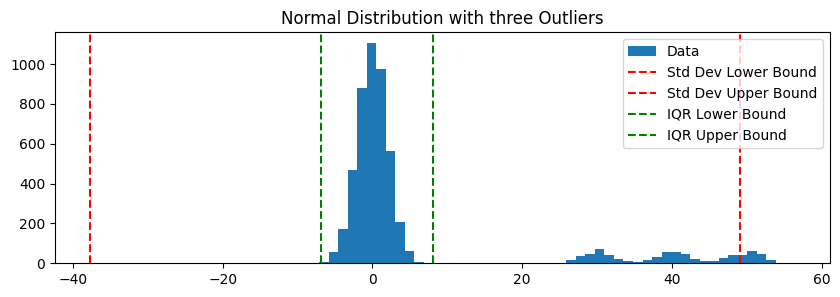

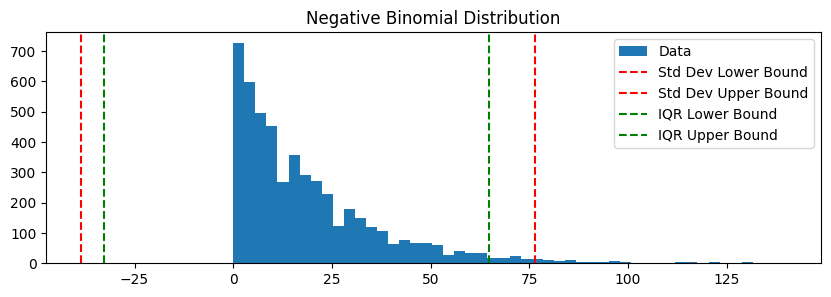

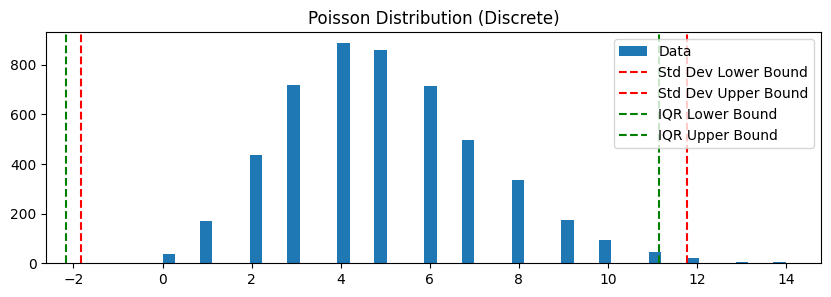

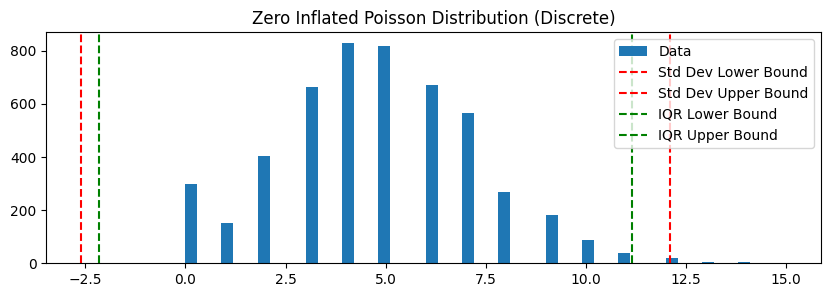

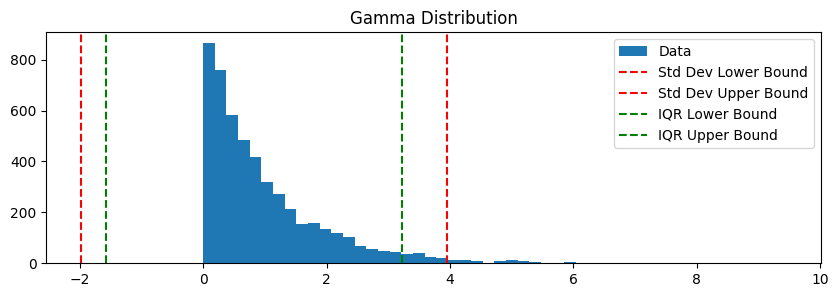

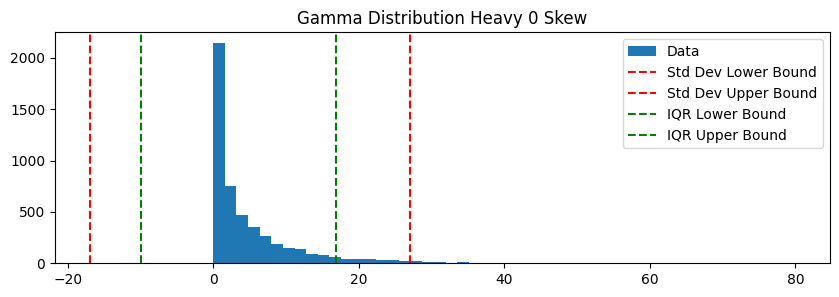

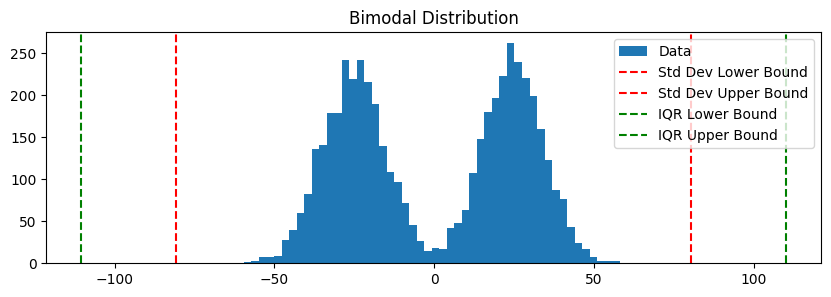

In [99]:
plot_data('normal')
plot_data('skewed')
plot_data('outliers')
plot_data('outliers_2')
plot_data('outliers_3')
plot_data('negative_binom')
plot_data('poisson')
plot_data('zip')
plot_data('gamma')
plot_data('gamma_smoosh')
plot_data('bimodal')

# Take Away
**There's no perfect metric for outliers, it's really about the data distribution and the use cases for your organization.**

## SageWorks provide BOTH methods but defaults to IQR
Why default to IQR for outliers?
###  Fast
Athena/Presto has a scalable/performant way to compute approximate quartiles based on Q-Digest/T-Digest
- https://prestodb.io/docs/current/functions/tdigest.html
- https://prestodb.io/docs/current/functions/qdigest.html

### Robust
The IQR method is less sensitive to extreme values or outliers in the data compared to the standard deviation method. Outliers can significantly skew the mean and standard deviation, leading to unreliable bounds. IQR, on the other hand, relies on medians and quartiles, making it more robust.

### No Assumption of Normality
The IQR method does not assume that the data follows a normal distribution. In contrast, the standard deviation method's effectiveness can be compromised if the data is not normally distributed. If the underlying distribution is skewed or has heavy tails, the IQR might provide a more accurate way to identify outliers.

## What if I don't know what the distribution of my data is?
Here's an approach you can follow:

- Prepare the Data: Clean the data and ensure there are no missing values or other issues that might interfere with the fitting process.

- Choose Candidate Distributions: Select a set of candidate distributions that you believe might be suitable. Common choices might include Normal, Exponential, Poisson, Negative Binomial, etc.

- Fit the Distributions: For each candidate distribution, estimate the parameters that provide the best fit to the data. You can use functions in scipy.stats for this.

- Evaluate the Fit: Compare the goodness of fit for each distribution using statistical tests or information criteria like the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC).

- Visual Inspection: It might also be helpful to plot the empirical data and the fitted probability density functions together to visually assess the fit.

There's also a Python module called **Fitter** that might be helpful
- Note: They need to put in a few more common distributions
- Upvote this: https://github.com/cokelaer/fitter/issues/76

Gaussian Data


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.043837,608.060145,627.611725,inf,0.008284,8.796554e-01
gamma,0.043954,610.342728,629.894308,inf,0.006547,9.819626e-01
norm,0.043974,608.475689,621.510075,inf,0.006526,9.825592e-01
cauchy,0.361381,538.460005,551.494391,inf,0.073798,3.978826e-24
rayleigh,0.920291,448.117674,461.152061,inf,0.201265,5.118144e-178


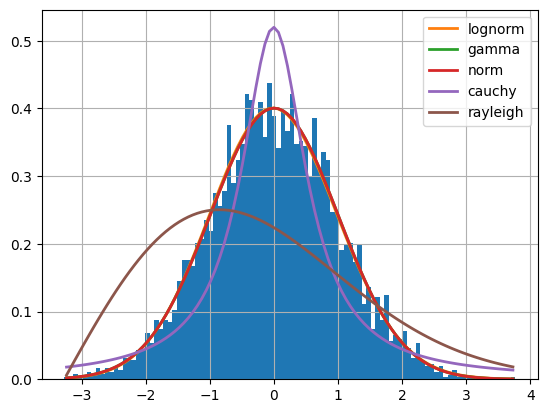

In [95]:
from fitter import Fitter

# Lets try two distributions
gaussian = np.random.normal(loc=0, scale=1, size=5000)
gamma_data = gamma.rvs(a=1, scale=1, size=5000)

print("Gaussian Data")
f = Fitter(gaussian, distributions="common")
f.fit()
f.summary()

Chi2 Distribution


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.025884,832.421682,851.973261,inf,0.008160,8.904146e-01
expon,0.026626,831.620178,844.654564,inf,0.009003,8.088679e-01
chi2,0.088562,794.095200,813.646780,inf,0.033933,1.947184e-05
exponpow,0.156492,1022.398681,1041.950260,inf,0.042619,2.497214e-08
lognorm,0.259570,743.461973,763.013552,inf,0.042817,2.106989e-08


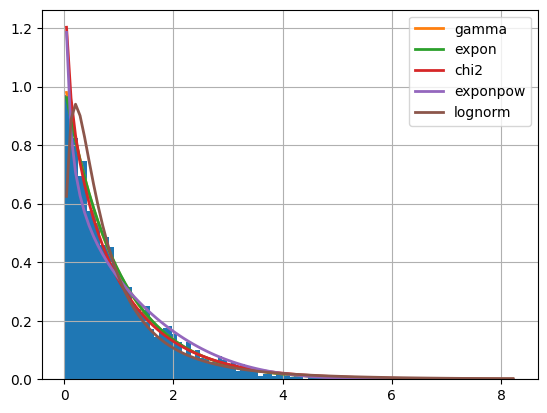

In [96]:
print("Chi2 Distribution")
f = Fitter(gamma_data, distributions="common")
f.fit()
f.summary()

# Wrap up: Building an AWS<sup>®</sup> ML Pipeline with SageWorks

<div style="float: right; padding: 20px"><img width="350" src="https://user-images.githubusercontent.com/4806709/236641571-fc38899a-8b92-4b7c-80a0-cc9d39b92e4a.png"></div>

This notebook used the SageWorks Science Toolkit to quickly build an AWS® Machine Learning Pipeline with the AQSolDB public dataset. We built a full AWS Machine Learning Pipeline from start to finish. 

SageWorks made it easy:
- Visibility into AWS services for every step of the process.
- Managed the complexity of organizing the data and populating the AWS services.
- Provided an easy to use API to perform Transformations and inspect Artifacts.

Using SageWorks will minimizize the time and manpower needed to incorporate AWS ML into your organization. If your company would like to be a SageWorks Alpha Tester, contact us at [sageworks@supercowpowers.com](mailto:sageworks@supercowpowers.com).

# Helper Methods

In [97]:
import numpy as np
from scipy.stats import nbinom, norm, gamma, poisson
import matplotlib.pyplot as plt


def zero_inflated_poisson(zero_inflation, size):
    psi=zero_inflation # Percent of zero measurements
    lam=5 # Increasing lam will fatten the tail
    pois = np.random.poisson(lam=lam, size=size) 
    zeros = np.random.binomial(n=1, p=psi, size=size) 
    zero_poisson = pois * (1 - zeros)
    return zero_poisson

    # Tail bumps
    #tail_bumps = [np.random.normal(loc=15, scale=1, size=5), np.random.normal(loc=25, scale=1, size=5)]
    #return np.concatenate([zero_poisson] + tail_bumps)

def negative_binomial(size):
    # Play around with these values
    r = 1.0  # Decreasing this will lengthen the tail
    p = 0.05  # Increasing this will put more data near zero
    return nbinom.rvs(r, p, size=size)

In [98]:
def generate_data(dist_type, size):
    outlier_1 = np.random.normal(loc=30, scale=2, size=int(0.05*size))
    outlier_2 = np.random.normal(loc=40, scale=2, size=int(0.05*size))
    outlier_3 = np.random.normal(loc=50, scale=2, size=int(0.05*size))
    if dist_type == 'normal':
        label = "Guassian/Normal Distribution" 
        dist = np.random.normal(loc=0, scale=1, size=size)
        return label, dist
    elif dist_type == 'skewed':
        label = "Normal Distribution with Left Skew"
        dist = np.random.normal(loc=0, scale=2, size=int(0.7*size))
        skew = np.random.normal(loc=5, scale=4, size=int(0.3*size))
        return label, np.concatenate([dist, skew])
    elif dist_type == 'outliers':
        label = "Normal Distribution with Outliers"
        dist = np.random.normal(loc=0, scale=2, size=int(0.9*size))
        return label, np.concatenate([dist, outlier_1])
    elif dist_type == 'outliers_2':
        label = "Normal Distribution with two Outliers"
        dist = np.random.normal(loc=0, scale=2, size=int(0.9*size))
        return label, np.concatenate([dist, outlier_1, outlier_2])
    elif dist_type == 'outliers_3':
        label = "Normal Distribution with three Outliers"
        dist = np.random.normal(loc=0, scale=2, size=int(0.9*size))
        return label, np.concatenate([dist, outlier_1, outlier_2, outlier_3])
    elif dist_type == 'bimodal':
        label = "Bimodal Distribution"
        mode_size = int(size/2)
        first_mode = np.random.normal(loc=-25, scale=10, size=mode_size)
        second_mode = np.random.normal(loc=25, scale=10, size=mode_size)
        return label, np.concatenate([first_mode, second_mode])
    elif dist_type == 'poisson':
        label = "Poisson Distribution (Discrete)"
        return label, zero_inflated_poisson(0.0, size)
    elif dist_type == 'zip':
        label = "Zero Inflated Poisson Distribution (Discrete)" 
        return label, zero_inflated_poisson(0.05, size)
    elif dist_type == 'negative_binom':
        label = "Negative Binomial Distribution"
        return label, negative_binomial(size)
    elif dist_type == 'gamma':
        label = "Gamma Distribution" 
        return label, gamma.rvs(a=1, scale=1, size=size)
    elif dist_type == 'gamma_smoosh':
        label = "Gamma Distribution Heavy 0 Skew" 
        return label, gamma.rvs(a=0.5, scale=10, size=size)


def detect_outliers_stddev(data, sigma=3):
    mean, std_dev = np.mean(data), np.std(data)
    cut_off = std_dev * sigma
    lower, upper = mean - cut_off, mean + cut_off
    return lower, upper

def detect_outliers_iqr(data, scale=1.72):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * scale
    lower, upper = q25 - cut_off, q75 + cut_off
    return lower, upper

def plot_data(dist_type):
    size = 5000
    label, data = generate_data(dist_type, size)
    lower_stddev, upper_stddev = detect_outliers_stddev(data)
    lower_iqr, upper_iqr = detect_outliers_iqr(data)
    
    plt.figure(figsize=(10, 3))
    plt.hist(data, bins=50, alpha=1.0, label='Data')
    plt.axvline(lower_stddev, color='r', linestyle='--', label='Std Dev Lower Bound')
    plt.axvline(upper_stddev, color='r', linestyle='--', label='Std Dev Upper Bound')
    plt.axvline(lower_iqr, color='g', linestyle='--', label='IQR Lower Bound')
    plt.axvline(upper_iqr, color='g', linestyle='--', label='IQR Upper Bound')
    plt.legend()
    plt.title(label)
    plt.show()